<a href="https://colab.research.google.com/github/l0bus/DatayAnalitics_Proyectos/blob/main/Proyecto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto 03 - Data Analitics

CASO: ESTADO NUTRICIONAL 

Nro	variable

1	Individuo

2	talla

3	edad

4	peso_kg

5	circun_cuello

6	IMC

7	circun_cintura

8	cadera

9	ind_cintura_cadera

10	ind_cintura_estatura

11	por_grasa_corporal

12	masa_corporal_magra_kg

13	pliegue_cutaneo_BICEPS

14	pliegue_cutaneo_TRICEPS

15	pliegue_cutaneo_ESCAPULAR

16	pliegue_cutaneo_SUPRAILIACO

17	Grupo



In [ ]:
# importamos las librerías del proyecto 03
# Librerias de Pandas
import pandas as pd
# Librerias de Numpy
import numpy as np
# Librerias de Math
import math as mt
# Librerias de grafica 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#cargamos la data desde nuestra PC
from google.colab import files
files.upload()
print("Archivo cargado")

Saving Data_Nutricion_grupos.xlsx to Data_Nutricion_grupos.xlsx
Archivo cargado


In [ ]:
df = pd.read_excel('Data_Nutricion_grupos.xlsx')
df.head()

,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos
0,Persona 1,155.7,16.0,71.2,35.7,29.576170,90.0,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0,A
1,Persona 2,166.5,16.0,61.0,31.8,22.364707,80.9,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0,A
2,Persona 3,151.3,16.0,49.1,30.5,21.623567,72.0,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0,A
3,Persona 4,151.7,16.0,54.6,32.6,23.117479,NaN,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0,A
4,Persona 5,160.3,16.0,58.0,30.1,22.260196,NaN,97.9,0.813075,NaN,30.276688,40.439521,10.0,19.0,20.0,19.0,A


# Tratamiento de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    652 non-null    object 
 1   talla                        624 non-null    float64
 2   edad                         645 non-null    float64
 3   peso_kg                      629 non-null    float64
 4   circun_cuello                623 non-null    float64
 5   IMC                          640 non-null    float64
 6   circun_cintura               637 non-null    float64
 7   cadera                       647 non-null    float64
 8   ind_cintura_cadera           639 non-null    float64
 9   ind_cintura_estatura         636 non-null    float64
 10  por_grasa_corporal           650 non-null    float64
 11  masa_corporal_magra_kg       648 non-null    float64
 12  pliegue_cutaneo_BICEPS       652 non-null    float64
 13  pliegue_cutaneo_TRIC

In [ ]:
df.shape

(652, 17)

In [ ]:
df.isnull().sum()

Individuo                       0
talla                          28
edad                            7
peso_kg                        23
circun_cuello                  29
IMC                            12
circun_cintura                 15
cadera                          5
ind_cintura_cadera             13
ind_cintura_estatura           16
por_grasa_corporal              2
masa_corporal_magra_kg          4
pliegue_cutaneo_BICEPS          0
pliegue_cutaneo_TRICEPS         0
pliegue_cutaneo_ESCAPULAR       0
pliegue_cutaneo_SUPRAILIACO     0
Grupos                          0
dtype: int64

De la información del tipo de datos:

* Para la variable EDAD porque es el número de datos secundarios, el tipo de datos apropiado debe ser int64 no float64
* La columna INDIVIDUO es un dato de identificación. Idealmente para ID, en este caso el tipo de dato es object.

Para ajustes de tipo de datos, se realizará en la etapa Ajuste Tipo de Datos.

Entonces podemos ver que:

* El dataframe tiene un total de 652 filas y 17 columnas.
* Dataframe todavía tiene valores null en las columnas talla, edad, peso_kg, circun_cuello, IMC, circun_cintura, cadera, ind_cintura_cadera, ind_cintura_estatura, por_grasa_corporal y masa_corporal_magra_kg.
* El objetivo de clasificación parece ser una columna Grupos con el tipo de datos int64.

In [ ]:
# Imputar la variable edad con los valores de la Moda
df['edad'].fillna(df['edad'].mode()[0], inplace = True)
df['edad'].value_counts()

14.0    252
15.0    224
16.0    140
13.0     26
17.0      8
0.0       1
12.0      1
Name: edad, dtype: int64

In [ ]:
# Eliminar filas que no son tan representativas
df.drop(df[df['edad'] < 13].index, inplace=True)

In [ ]:
# Cambiando la variable edad a tipo entero:
df['edad'] = df['edad'].astype(int)

In [ ]:
numerical_features = ["edad",	 "talla",	"peso_kg",	"circun_cuello",	"IMC",	"circun_cintura",
                      "cadera",	"ind_cintura_cadera",	"ind_cintura_estatura",	"por_grasa_corporal", "masa_corporal_magra_kg", 
                      "pliegue_cutaneo_BICEPS", "pliegue_cutaneo_TRICEPS", "pliegue_cutaneo_ESCAPULAR", "pliegue_cutaneo_SUPRAILIACO"]
categorical_features = ["Grupos"]

In [ ]:
#Evaluamos valores faltantes y cuanto representan
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,circun_cuello,29,4.462
1,talla,28,4.308
2,peso_kg,23,3.538
3,ind_cintura_estatura,16,2.462
4,circun_cintura,15,2.308
5,ind_cintura_cadera,13,2.000
6,IMC,12,1.846
7,cadera,5,0.769
8,masa_corporal_magra_kg,4,0.615
9,por_grasa_corporal,2,0.308


Hay 10 columnas a las que les faltan valores:
1. circun_cuello
2. talla
3. peso_kg
4. ind_cintura_estatura
5. circun_cintura
6. ind_cintura_cadera
7. IMC
9. cadera
10. masa_corporal_magra_kg
11. por_grasa_corporal

Observación:
* circun_cuello, es una variable que no tiene relacion con el resto de variables
* talla, peso_kg y IMC, son variables que tienen relación
* circun_cintura, talla y ind_cintura_estatura, son variables que tienen reación
* circun_cintura, cadera y ind_cintura_cadera, son variables que tienen reación
* masa_corporal_magra_kg
* por_grasa_corporal

In [ ]:
def desc_num_feature(numerical_features):
  feature_name=numerical_features
  fig, ax = plt.subplots(figsize=(10,4))
  df[feature_name].hist(bins=30, edgecolor="b")
  ax.set_title(feature_name, size=25)
  df[feature_name].describe().round(2)

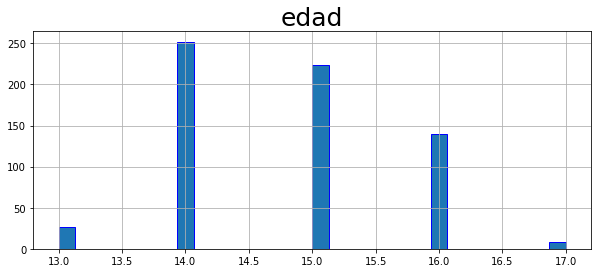

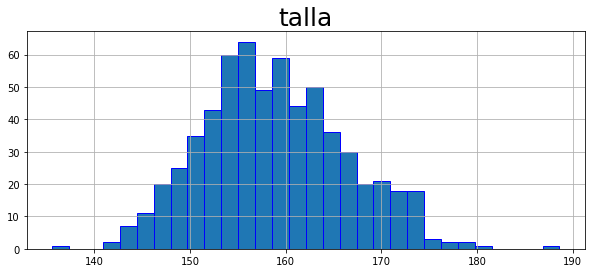

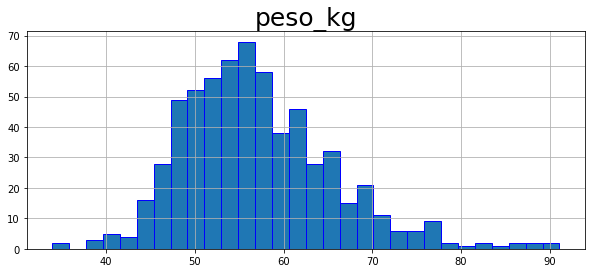

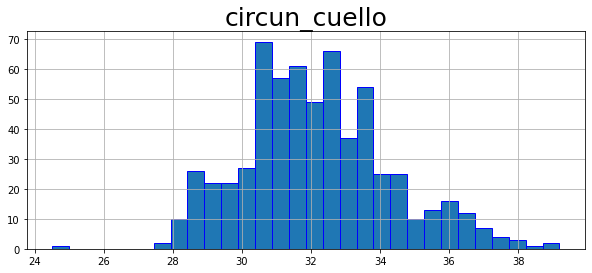

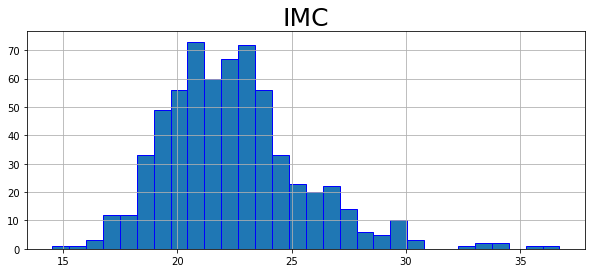

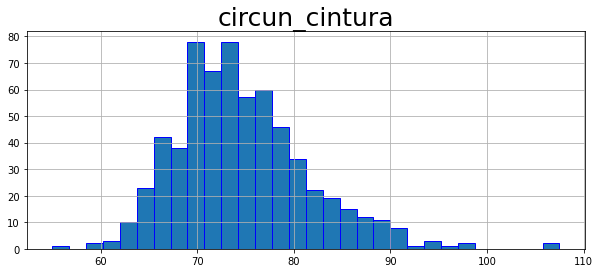

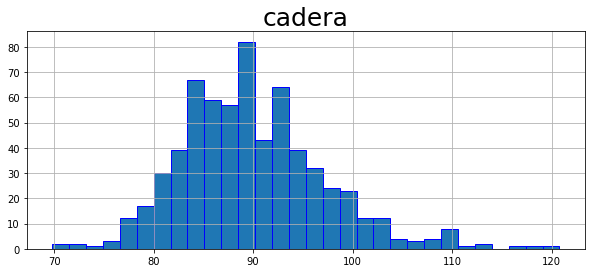

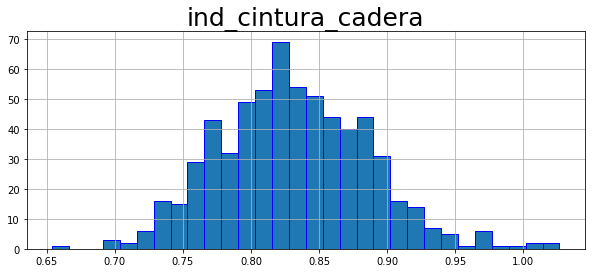

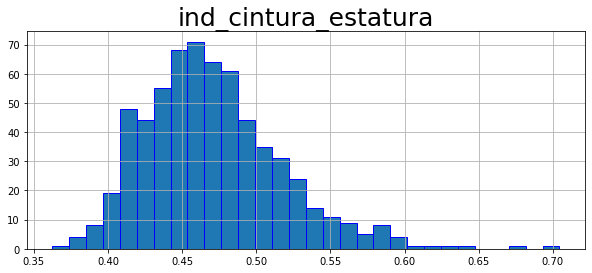

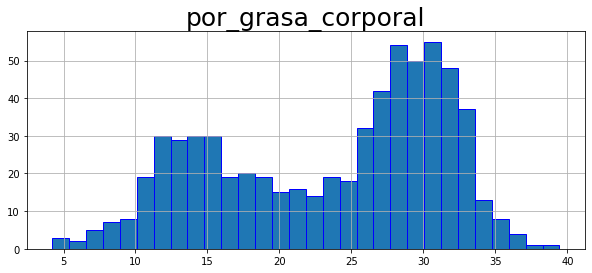

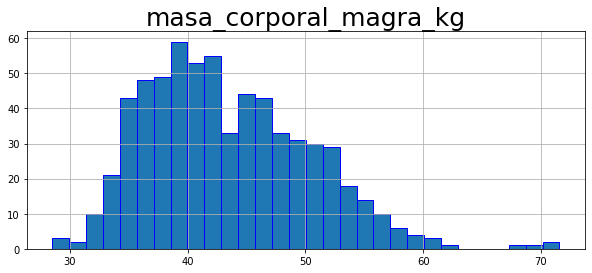

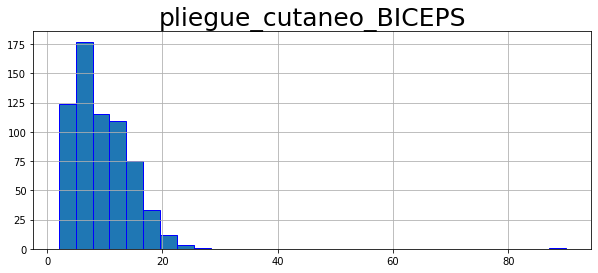

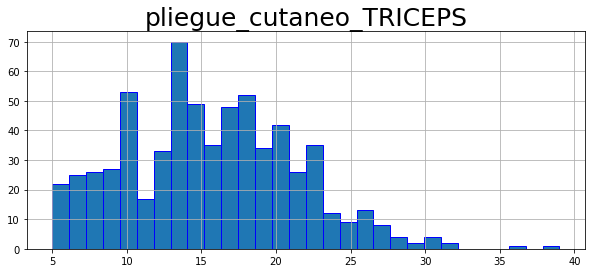

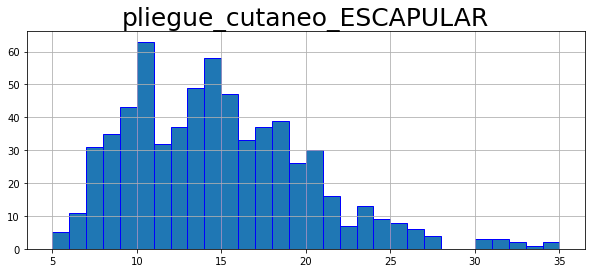

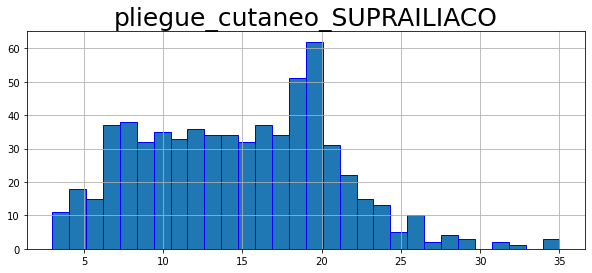

In [ ]:
#Visualizamos el comportamiento de las variables
for x in numerical_features:
  desc_num_feature(x)

In [ ]:
# Hacemos un resumen con la estadísticas descriptivas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
talla,622.0,158.843569,7.474479,135.600000,153.700000,158.200000,163.700000,188.600000
edad,650.0,14.772308,0.872717,13.000000,14.000000,15.000000,15.000000,17.000000
peso_kg,627.0,56.962839,8.592474,33.900000,51.000000,55.800000,61.750000,91.100000
circun_cuello,621.0,32.140258,2.154191,24.500000,30.700000,32.000000,33.500000,39.200000
IMC,638.0,22.428345,3.043839,14.537886,20.275221,22.174447,23.910087,36.708603
circun_cintura,635.0,74.525354,6.919738,55.000000,70.000000,73.600000,78.000000,107.500000
cadera,645.0,89.878915,7.207371,69.800000,85.000000,89.000000,94.000000,120.800000
ind_cintura_cadera,637.0,0.831040,0.054800,0.654018,0.794286,0.827897,0.866995,1.026528
ind_cintura_estatura,634.0,0.470602,0.046448,0.362319,0.438750,0.464779,0.494350,0.704411
por_grasa_corporal,648.0,23.520868,7.865302,4.214310,15.893914,26.094372,30.073493,39.445282


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 0 to 651
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    650 non-null    object 
 1   talla                        622 non-null    float64
 2   edad                         650 non-null    int64  
 3   peso_kg                      627 non-null    float64
 4   circun_cuello                621 non-null    float64
 5   IMC                          638 non-null    float64
 6   circun_cintura               635 non-null    float64
 7   cadera                       645 non-null    float64
 8   ind_cintura_cadera           637 non-null    float64
 9   ind_cintura_estatura         634 non-null    float64
 10  por_grasa_corporal           648 non-null    float64
 11  masa_corporal_magra_kg       646 non-null    float64
 12  pliegue_cutaneo_BICEPS       650 non-null    float64
 13  pliegue_cutaneo_TRIC

## Analizamos las variables Talla, Peso_kg y IMC

In [ ]:
# Evaluamos si las varibles talla, peso_kg y IMC, tiene valor, de no tenerlo representan a un persona que no puede ser analizada
df["ExisteTallaPesoIMC"] = df.apply(lambda row: np.nan if pd.isnull(row["talla"]) and pd.isnull(row["peso_kg"]) and pd.isnull(row["IMC"]) else 0, axis=1)
df = df.dropna(subset=['ExisteTallaPesoIMC'])
df['ExisteTallaPesoIMC'] = df['ExisteTallaPesoIMC'].astype(int)
#df.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Evaluamos si las variables talla y peso_kg tienen valor, de tenerlo se podria calcular el IMC
df["ExisteTallaPeso"] = df.apply(lambda row: np.nan if pd.isnull(row["talla"]) and pd.isnull(row["peso_kg"]) else 0, axis=1)
df = df.dropna(subset=['ExisteTallaPeso'])
df['ExisteTallaPeso'] = df['ExisteTallaPeso'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Evaluamos si las variables talla y IMC tienen valor, de tenerlo se podria calcular el peso_kg
df["ExisteTallaIMC"] = df.apply(lambda row: np.nan if pd.isnull(row["talla"]) and pd.isnull(row["IMC"]) else 0, axis=1)
# En este caso no eliminamos nada por que tanto la variable talla como IMC, tienen valores

In [ ]:
# Evaluamos si las variables peso_kg  y IMC tienen valor, de tenerlo se podria calcular el talla
df["Existepeso_kgIMC"] = df.apply(lambda row: np.nan if pd.isnull(row["peso_kg"]) and pd.isnull(row["IMC"]) else 0, axis=1)
df = df.dropna(subset=['Existepeso_kgIMC'])
df['Existepeso_kgIMC'] = df['Existepeso_kgIMC'].astype(int)

## Analizamos las variables circun_cintura, cadera y ind_cinturacadera

In [ ]:
# Evaluamos si las variables circun_cintura, cadera e ind_cinturacadera tienen valor, de no tenerlo representan a un persona que no puede ser analizada
df["Existecircun_cinturacaderaind_cintura_cadera"] = df.apply(lambda row: np.nan if pd.isnull(row["circun_cintura"]) and pd.isnull(row["cadera"]) and pd.isnull(row["ind_cintura_cadera"]) else 0, axis=1)
# En este caso no eliminamos nada por que tanto las variables circun_cintura, cadera e ind_cinturacadera, tienen valores

In [ ]:
# Evaluamos si las variables circun_cintura y cadera tienen valor, de tenerlo se podria calcular el id_cinturacadera
df["Existecircun_cinturacadera"] = df.apply(lambda row: np.nan if pd.isnull(row["circun_cintura"]) and pd.isnull(row["cadera"]) else 0, axis=1)
df = df.dropna(subset=['Existecircun_cinturacadera'])
df['Existecircun_cinturacadera'] = df['Existecircun_cinturacadera'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Evaluamos si las variables circun_cintura y id_cinturacadera tienen valor, de tenerlo se podria calcular el cadera
df["Existecircun_cinturaind_cintura_cadera"] = df.apply(lambda row: np.nan if pd.isnull(row["circun_cintura"]) and pd.isnull(row["ind_cintura_cadera"]) else 0, axis=1)
df = df.dropna(subset=['Existecircun_cinturaind_cintura_cadera'])
df['Existecircun_cinturaind_cintura_cadera'] = df['Existecircun_cinturaind_cintura_cadera'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Evaluamos si las variables cadera e ind_cinturacadera y tienen valor, de tenerlo se podria calcular el circun_cadera
df["Existecaderacaderaind_cintura"] = df.apply(lambda row: np.nan if pd.isnull(row["cadera"]) and pd.isnull(row["ind_cintura_cadera"]) else 0, axis=1)
# En este caso no eliminamos nada por que tanto las variables cadera e ind_cinturacadera, tienen valores

## Analizamos las variables circun_cintura, talla y ind_cintura_estatura

In [ ]:
# Evaluamos si las variables circun_cintura, talla e ind_cintura_estatura tienen valor, de no tenerlo representan a un persona que no puede ser analizada
df["Existecircun_cinturaestaturaind_cintura_estatura"] = df.apply(lambda row: np.nan if pd.isnull(row["circun_cintura"]) and pd.isnull(row["talla"]) and pd.isnull(row["ind_cintura_estatura"])else 0, axis=1)
# En este caso no eliminamos nada por que tanto las variables circun_cintura, talla e ind_cintura_estatura, tienen valores
#df.info()

In [ ]:
# Evaluamos si las variables circun_cintura y talla tienen valor, de tenerlo se podria calcular el id_cinturaestatura
df["Existecircun_cinturaestatura"] = df.apply(lambda row: np.nan if pd.isnull(row["circun_cintura"]) and pd.isnull(row["talla"]) else 0, axis=1)
df = df.dropna(subset=['Existecircun_cinturaestatura'])
df['Existecircun_cinturaestatura'] = df['Existecircun_cinturaestatura'].astype(int)

In [ ]:
# Evaluamos si las variables ind_cintura_estatura y talla tienen valor, de tenerlo se podria calcular el circun_cintura
df["Existeind_cintura_estaturatalla"] = df.apply(lambda row: np.nan if pd.isnull(row["ind_cintura_estatura"]) and pd.isnull(row["talla"]) else 0, axis=1)
# En este caso no eliminamos nada por que tanto las variables ind_cintura_estatura y talla, tienen valores

In [ ]:
# Evaluamos si las variables ind_cintura_estatura y circun_cintura tienen valor, de tenerlo se podria calcular el talla
df["Existeind_cintura_estaturacircun_cintura"] = df.apply(lambda row: np.nan if pd.isnull(row["ind_cintura_estatura"]) and pd.isnull(row["circun_cintura"]) else 0, axis=1)
df = df.dropna(subset=['Existeind_cintura_estaturacircun_cintura'])
df['Existeind_cintura_estaturacircun_cintura'] = df['Existeind_cintura_estaturacircun_cintura'].astype(int)

## Analizamos las variables por_grasa_corporal y masa corporal_magra_kg

En esta caso estas variables tienen relación con el SEXO de la persona en estudio, pero dicha variable no es parte de la información, por lo que los registros que no la tienen los eliminaremos del analisis

In [ ]:
df = df.dropna(subset=['por_grasa_corporal', 'masa_corporal_magra_kg'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 651
Data columns (total 29 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Individuo                                         628 non-null    object 
 1   talla                                             611 non-null    float64
 2   edad                                              628 non-null    int64  
 3   peso_kg                                           615 non-null    float64
 4   circun_cuello                                     602 non-null    float64
 5   IMC                                               619 non-null    float64
 6   circun_cintura                                    619 non-null    float64
 7   cadera                                            624 non-null    float64
 8   ind_cintura_cadera                                617 non-null    float64
 9   ind_cintura_estatura 

## Completamos los valores de las variables talla, peso_kg y IMC

In [ ]:
#Completamos las tallas
df["TallaCompleta"] = df.apply(lambda row: round((1/mt.sqrt(row["IMC"]/row["peso_kg"])), 2) if pd.isnull(row["talla"]) else row["talla"], axis=1)
#Completamos los pesos
df["Peso_kgCompleta"] = df.apply(lambda row: round((row["IMC"]*((row["talla"]/100)**2)), 2) if pd.isnull(row["peso_kg"]) else row["peso_kg"], axis=1)
#Completamos el IMC
df["IMCCompleta"] = df.apply(lambda row: round(((row["peso_kg"])/((row["talla"]/100)**2)), 2) if pd.isnull(row["IMC"]) else row["IMC"], axis=1)

## Completamos los valores de las variables circun_cintura, cadera e ind_cintura_cadera

In [ ]:
#Completamos el circun_cintura
df["circun_cinturaCompleta"] = df.apply(lambda row: round((row["cadera"]*row["ind_cintura_cadera"]), 2) if pd.isnull(row["circun_cintura"]) else row["circun_cintura"], axis=1)
#Completamos el cadera
df["caderaCompleta"] = df.apply(lambda row: round((row["circun_cintura"]*row["ind_cintura_cadera"]), 2) if pd.isnull(row["cadera"]) else row["cadera"], axis=1)
#Completamos el ind_cintura_cadera
df["ind_cintura_caderaCompleta"] = df.apply(lambda row: round((row["circun_cintura"]*row["cadera"]), 2) if pd.isnull(row["ind_cintura_cadera"]) else row["ind_cintura_cadera"], axis=1)

## Completamos los valores de las variables circun_cintura, talla e ind_cintura_estatura

In [ ]:
#Completamos el ind_cintura_estatura
df["ind_cintura_estaturaCompleta"] = df.apply(lambda row: round((row["circun_cintura"]/row["talla"]), 2) if pd.isnull(row["ind_cintura_estatura"]) else row["ind_cintura_estatura"], axis=1)
#Completamos la talla
df["TallaCompleta"] = df.apply(lambda row: round((row["circun_cintura"]/row["ind_cintura_estatura"]), 2) if pd.isnull(row["talla"]) else row["talla"], axis=1)

Creamos la variable categorica EstadoNutricional
Para poder segmentar nuestro analisis

In [ ]:
def fEstadonutricional(parm1, parm2):
   vedad = parm1;
   vimc = parm2;
   if vedad==12:
      if vimc <= 15.4:
        rcode = 'Bajo Peso'
      elif vimc >= 15.5 and vimc <= 20.9:
        rcode = 'Normal'
      elif vimc >= 21 and vimc <= 24.1:
        rcode = 'Sobrepeso'
      else:
        rcode = 'Obesidad'
   elif vedad==13:
      if vimc <= 16:
        rcode = 'Bajo Peso'
      elif vimc >= 16.1 and vimc <= 21.7:
        rcode = 'Normal'
      elif vimc >= 21.8 and vimc <= 25:
        rcode = 'Sobrepeso'
      else:
        rcode = 'Obesidad'
   elif vedad==14:
      if vimc <= 16.5:
        rcode = 'Bajo Peso'
      elif vimc >= 16.6 and vimc <= 22.5:
        rcode = 'Normal'
      elif vimc >= 22.6 and vimc <= 25.9:
        rcode = 'Sobrepeso'
      else:
        rcode = 'Obesidad'
   elif vedad==15:
      if vimc <= 17.2:
        rcode = 'Bajo Peso'
      elif vimc >= 17.3 and vimc <= 23.3:
        rcode = 'Normal'
      elif vimc >= 23.4 and vimc <= 26.7:
        rcode = 'Sobrepeso'
      else:
        rcode = 'Obesidad'
   elif vedad==16:
      if vimc <= 17.7:
        rcode = 'Bajo Peso'
      elif vimc >= 17.8 and vimc <= 24.1:
        rcode = 'Normal'
      elif vimc >= 24.2 and vimc <= 27.4:
        rcode = 'Sobrepeso'
      else:
        rcode = 'Obesidad'
   elif vedad==17:
      if vimc <= 18.3:
        rcode = 'Bajo Peso'
      elif vimc >= 18.4 and vimc <= 24.8:
        rcode = 'Normal'
      elif vimc >= 24.9 and vimc <= 28.1:
        rcode = 'Sobrepeso'
      else:
        rcode = 'Obesidad'
   else: 
      rcode = 'Error'
   return rcode


In [ ]:
df["EstadoNutricional"] = df.apply(lambda row: fEstadonutricional(row["edad"], row["IMCCompleta"]), axis=1)

In [ ]:
df.isnull().sum() 

Individuo                                            0
talla                                               17
edad                                                 0
peso_kg                                             13
circun_cuello                                       26
IMC                                                  9
circun_cintura                                       9
cadera                                               4
ind_cintura_cadera                                  11
ind_cintura_estatura                                10
por_grasa_corporal                                   0
masa_corporal_magra_kg                               0
pliegue_cutaneo_BICEPS                               0
pliegue_cutaneo_TRICEPS                              0
pliegue_cutaneo_ESCAPULAR                            0
pliegue_cutaneo_SUPRAILIACO                          0
Grupos                                               0
ExisteTallaPesoIMC                                   0
ExisteTall

In [ ]:
df = df[["Individuo", "TallaCompleta", "edad", "Peso_kgCompleta", "circun_cuello", "IMCCompleta", "circun_cinturaCompleta", "caderaCompleta", "ind_cintura_caderaCompleta", "ind_cintura_estaturaCompleta", "por_grasa_corporal", "masa_corporal_magra_kg", "pliegue_cutaneo_BICEPS", "pliegue_cutaneo_TRICEPS", "pliegue_cutaneo_ESCAPULAR", "pliegue_cutaneo_SUPRAILIACO", "Grupos", "EstadoNutricional"]].copy()
df

,Individuo,TallaCompleta,edad,Peso_kgCompleta,circun_cuello,IMCCompleta,circun_cinturaCompleta,caderaCompleta,ind_cintura_caderaCompleta,ind_cintura_estaturaCompleta,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos,EstadoNutricional
0,Persona 1,155.7,16,71.2,35.7,29.576170,90.0,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0,A,Obesidad
1,Persona 2,166.5,16,61.0,31.8,22.364707,80.9,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0,A,Normal
2,Persona 3,151.3,16,49.1,30.5,21.623567,72.0,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0,A,Normal
3,Persona 4,151.7,16,54.6,32.6,23.117479,74.4,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0,A,Normal
5,Persona 6,162.4,16,70.8,33.9,26.124451,86.5,106.1,0.815269,0.532635,31.439726,48.540674,11.0,25.0,18.0,20.0,A,Sobrepeso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,Persona 648,165.5,14,88.0,32.5,21.029381,72.5,85.0,0.852941,0.438066,19.209928,71.095263,12.0,13.0,12.0,13.0,B,Normal
648,Persona 649,144.2,14,48.6,31.5,23.132073,73.0,87.5,0.834286,0.506241,28.565420,34.717206,8.0,18.0,18.0,16.0,B,Sobrepeso
649,Persona 650,154.0,15,58.9,31.5,22.769438,85.0,96.0,0.885417,0.551948,26.623783,43.218592,8.0,12.0,14.0,18.0,B,Normal
650,Persona 651,174.3,14,88.7,37.0,27.023922,85.8,101.0,0.849505,0.492255,22.424506,68.809463,11.0,16.0,18.0,20.0,B,Obesidad


In [ ]:
#Generamos un ultimo dataframe df1 para eliminar los ultimos datos nulos
df1 = df.copy()

In [ ]:
#Borados los ultimos datos nulos
df1 = df1.dropna()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 0 to 651
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Individuo                     602 non-null    object 
 1   TallaCompleta                 602 non-null    float64
 2   edad                          602 non-null    int64  
 3   Peso_kgCompleta               602 non-null    float64
 4   circun_cuello                 602 non-null    float64
 5   IMCCompleta                   602 non-null    float64
 6   circun_cinturaCompleta        602 non-null    float64
 7   caderaCompleta                602 non-null    float64
 8   ind_cintura_caderaCompleta    602 non-null    float64
 9   ind_cintura_estaturaCompleta  602 non-null    float64
 10  por_grasa_corporal            602 non-null    float64
 11  masa_corporal_magra_kg        602 non-null    float64
 12  pliegue_cutaneo_BICEPS        602 non-null    float64
 13  plieg

In [ ]:
# Hacemos un resumen con la estadísticas descriptivas
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
TallaCompleta,602.0,158.837375,7.403306,141.500000,153.625000,158.200000,163.675000,188.600000
edad,602.0,14.757475,0.871619,13.000000,14.000000,15.000000,15.000000,17.000000
Peso_kgCompleta,602.0,56.872924,8.473245,33.900000,51.025000,55.650000,61.675000,91.100000
circun_cuello,602.0,32.150498,2.157903,24.500000,30.700000,32.000000,33.500000,39.200000
IMCCompleta,602.0,22.400682,3.044080,14.537886,20.273556,22.120429,23.861445,36.708603
circun_cinturaCompleta,602.0,74.583223,6.855116,55.000000,70.000000,73.750000,78.000000,107.500000
caderaCompleta,602.0,89.678322,7.470921,52.810000,85.000000,89.000000,93.800000,120.800000
ind_cintura_caderaCompleta,602.0,114.651319,844.430646,0.692053,0.795269,0.828553,0.867875,8451.540000
ind_cintura_estaturaCompleta,602.0,0.470255,0.045642,0.362319,0.439660,0.464882,0.493526,0.704411
por_grasa_corporal,602.0,23.462143,7.908049,4.214310,15.774772,26.094372,30.073493,39.445282


count        602
unique         4
top       Normal
freq         391
Name: EstadoNutricional, dtype: object

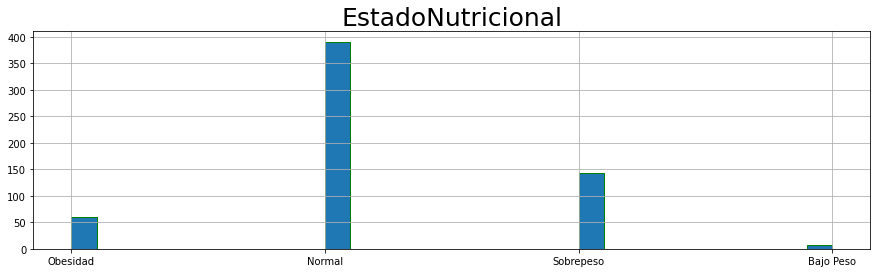

In [ ]:
fig, ax = plt.subplots(figsize=(15,4))
df1["EstadoNutricional"].hist(bins=30, edgecolor="g")
ax.set_title("EstadoNutricional", size=25)
df1["EstadoNutricional"].describe()

In [ ]:
#Evaluamos cuanto es el valor que representa cada edad de la data
(df1['EstadoNutricional'].value_counts()/df1['EstadoNutricional'].value_counts().sum())*100

Normal       64.950166
Sobrepeso    23.920266
Obesidad      9.966777
Bajo Peso     1.162791
Name: EstadoNutricional, dtype: float64

# 1er entregable: Análisis Exploratorio de datos (EDA) 
Estadística Descriptiva.

## Graficas de variables

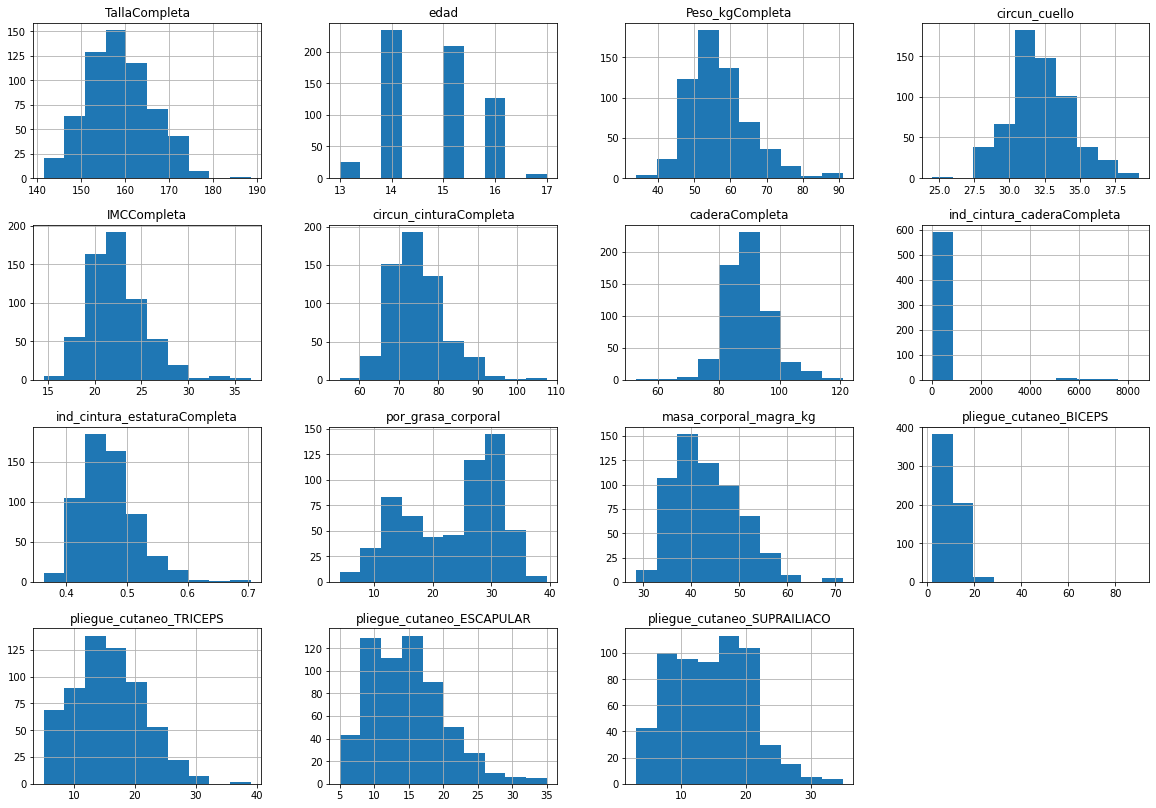

In [ ]:
df1.hist(figsize=(20,14))
plt.show()

In [ ]:
#Conocer el tamaño de los datos
df1.shape

(602, 18)

In [ ]:
# Hacemos un resumen con la estadísticas descriptivas
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
TallaCompleta,602.0,158.837375,7.403306,141.500000,153.625000,158.200000,163.675000,188.600000
edad,602.0,14.757475,0.871619,13.000000,14.000000,15.000000,15.000000,17.000000
Peso_kgCompleta,602.0,56.872924,8.473245,33.900000,51.025000,55.650000,61.675000,91.100000
circun_cuello,602.0,32.150498,2.157903,24.500000,30.700000,32.000000,33.500000,39.200000
IMCCompleta,602.0,22.400682,3.044080,14.537886,20.273556,22.120429,23.861445,36.708603
circun_cinturaCompleta,602.0,74.583223,6.855116,55.000000,70.000000,73.750000,78.000000,107.500000
caderaCompleta,602.0,89.678322,7.470921,52.810000,85.000000,89.000000,93.800000,120.800000
ind_cintura_caderaCompleta,602.0,114.651319,844.430646,0.692053,0.795269,0.828553,0.867875,8451.540000
ind_cintura_estaturaCompleta,602.0,0.470255,0.045642,0.362319,0.439660,0.464882,0.493526,0.704411
por_grasa_corporal,602.0,23.462143,7.908049,4.214310,15.774772,26.094372,30.073493,39.445282


In [ ]:
numerical_features = ["edad",	 "TallaCompleta",	"Peso_kgCompleta",	"circun_cuello",	"IMCCompleta",	"circun_cinturaCompleta",
                      "caderaCompleta",	"ind_cintura_caderaCompleta",	"ind_cintura_estaturaCompleta",	"por_grasa_corporal", "masa_corporal_magra_kg", 
                      "pliegue_cutaneo_BICEPS", "pliegue_cutaneo_TRICEPS", "pliegue_cutaneo_ESCAPULAR", "pliegue_cutaneo_SUPRAILIACO"]
categorical_features = ["Grupos", "EstadoNutricional"]

## Correlación de Pearson
Aplicamos esta herramienta para conocer la compara nuestras variables numericas

In [ ]:
#Correlación numérica
df1[numerical_features].corr()

,edad,TallaCompleta,Peso_kgCompleta,circun_cuello,IMCCompleta,circun_cinturaCompleta,caderaCompleta,ind_cintura_caderaCompleta,ind_cintura_estaturaCompleta,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
edad,1.000000,0.104574,0.149087,0.084724,0.148900,0.171804,0.140415,0.104267,0.115799,0.072839,0.097719,-0.028433,0.042383,0.094064,0.065406
TallaCompleta,0.104574,1.000000,0.443490,0.186207,-0.165736,0.146755,-0.002664,0.015833,-0.339057,-0.514304,0.750870,-0.318290,-0.369901,-0.279849,-0.321083
Peso_kgCompleta,0.149087,0.443490,1.000000,0.776695,0.765673,0.800506,0.676655,-0.062441,0.546891,0.223200,0.773086,0.201078,0.367540,0.486313,0.421838
circun_cuello,0.084724,0.186207,0.776695,1.000000,0.773797,0.722065,0.479101,-0.033842,0.599551,0.111391,0.635602,0.121653,0.298645,0.473157,0.376839
IMCCompleta,0.148900,-0.165736,0.765673,0.773797,1.000000,0.793443,0.756751,-0.078708,0.834735,0.597343,0.304778,0.434548,0.669540,0.748231,0.686850
circun_cinturaCompleta,0.171804,0.146755,0.800506,0.722065,0.793443,1.000000,0.698901,-0.038328,0.879776,0.358514,0.492880,0.269726,0.448112,0.606140,0.539480
caderaCompleta,0.140415,-0.002664,0.676655,0.479101,0.756751,0.698901,1.000000,-0.044364,0.663625,0.602479,0.223278,0.381841,0.645858,0.625644,0.626002
ind_cintura_caderaCompleta,0.104267,0.015833,-0.062441,-0.033842,-0.078708,-0.038328,-0.044364,1.000000,-0.042012,-0.064505,-0.020068,-0.060207,-0.070797,-0.084446,-0.064807
ind_cintura_estaturaCompleta,0.115799,-0.339057,0.546891,0.599551,0.834735,0.879776,0.663625,-0.042012,1.000000,0.582209,0.110627,0.405513,0.598809,0.708054,0.662278
por_grasa_corporal,0.072839,-0.514304,0.223200,0.111391,0.597343,0.358514,0.602479,-0.064505,0.582209,1.000000,-0.438648,0.699861,0.877991,0.760569,0.841231


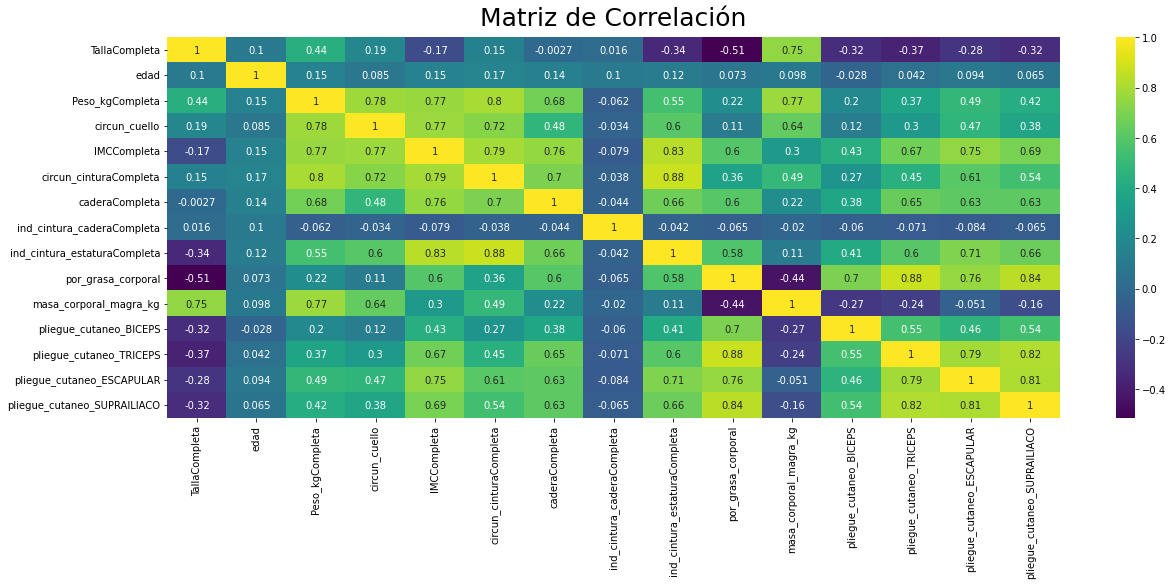

In [ ]:
# Matriz de correlación
plt.figure(figsize=(20, 7))
heatmap = sns.heatmap(df1.corr(),cmap='viridis',annot=True)

heatmap.set_title('Matriz de Correlación', fontdict={'fontsize':25}, pad=12);

In [ ]:
df1.head()

,Individuo,TallaCompleta,edad,Peso_kgCompleta,circun_cuello,IMCCompleta,circun_cinturaCompleta,caderaCompleta,ind_cintura_caderaCompleta,ind_cintura_estaturaCompleta,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos,EstadoNutricional
0,Persona 1,155.7,16,71.2,35.7,29.576170,90.0,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0,A,Obesidad
1,Persona 2,166.5,16,61.0,31.8,22.364707,80.9,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0,A,Normal
2,Persona 3,151.3,16,49.1,30.5,21.623567,72.0,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0,A,Normal
3,Persona 4,151.7,16,54.6,32.6,23.117479,74.4,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0,A,Normal
5,Persona 6,162.4,16,70.8,33.9,26.124451,86.5,106.1,0.815269,0.532635,31.439726,48.540674,11.0,25.0,18.0,20.0,A,Sobrepeso


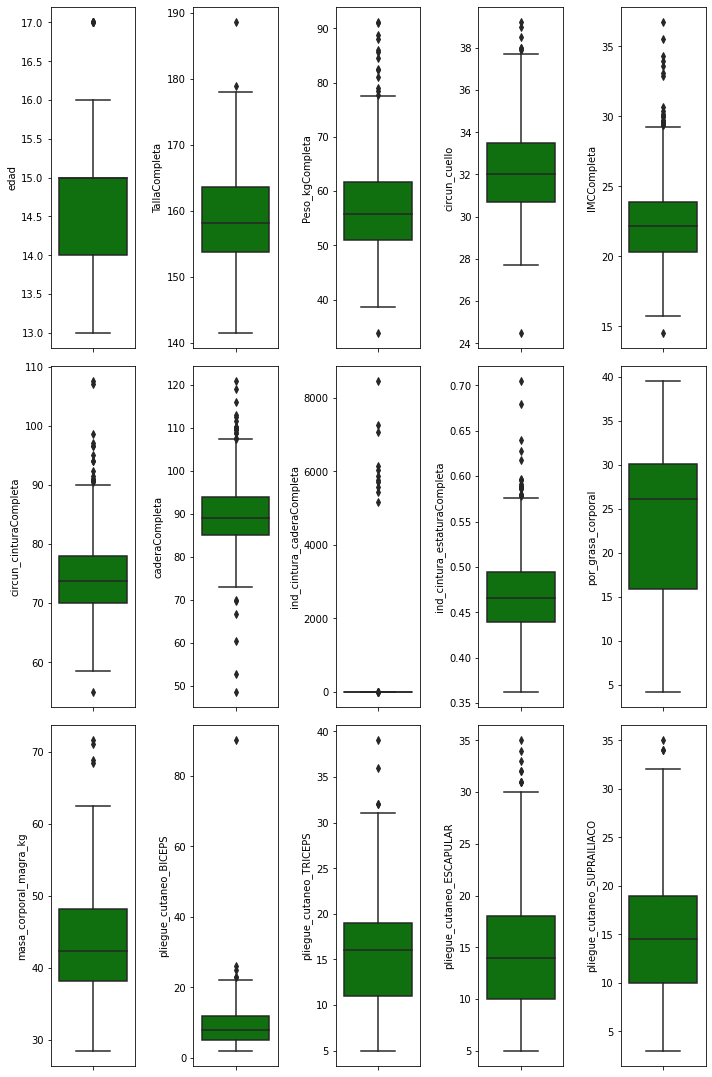

In [ ]:
plt.figure(figsize=(10, 20))
for i in range(0, len(numerical_features)):
    plt.subplot(4, int(len(numerical_features)/3), i+1)
    sns.boxplot(y=df[numerical_features[i]], color='g', orient='v')
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

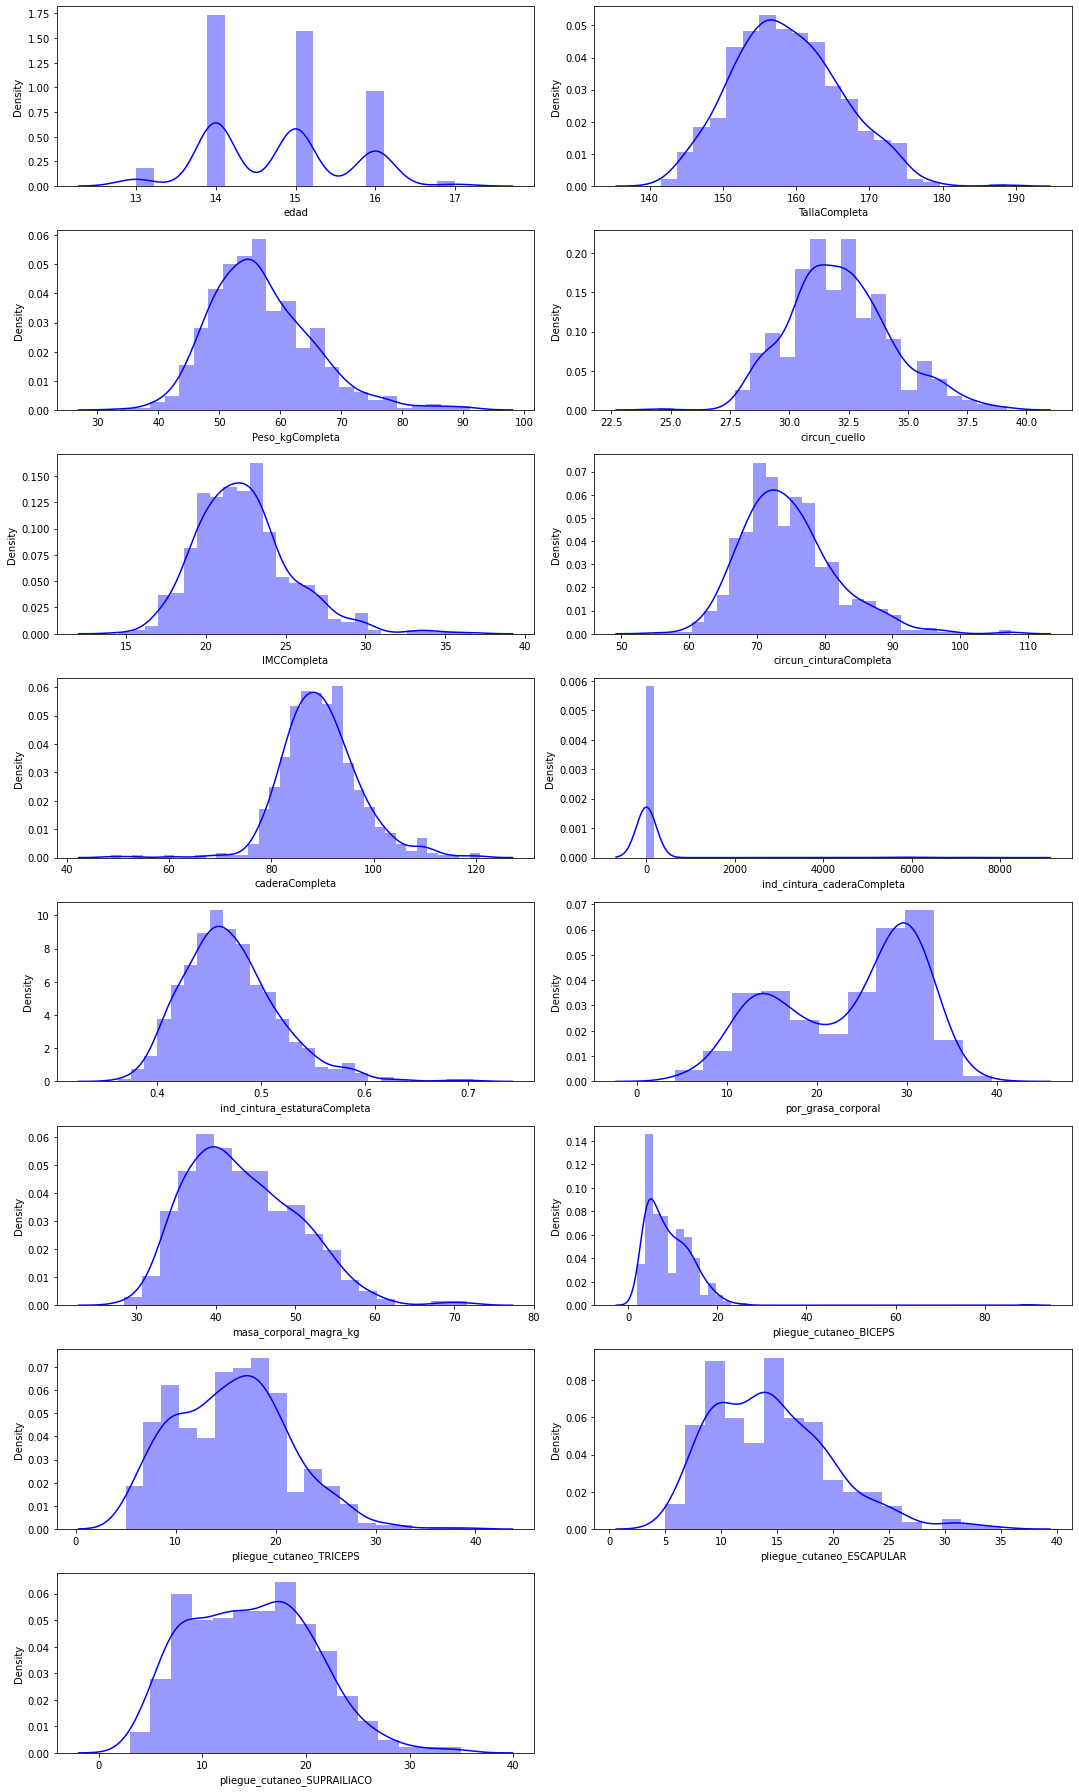

In [ ]:
plt.figure(figsize=(15, 25))
for i in range(0, len(numerical_features)):
    plt.subplot(8, int(len(numerical_features)/7), i+1)
    sns.distplot(df[numerical_features[i]], color="blue")
    plt.tight_layout()

Para el gráfico de distribución, lo principal a tener en cuenta es la forma de la distribución:

Se puede visualizar que la mayoría de las columnas tienen una distribución sesgada

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


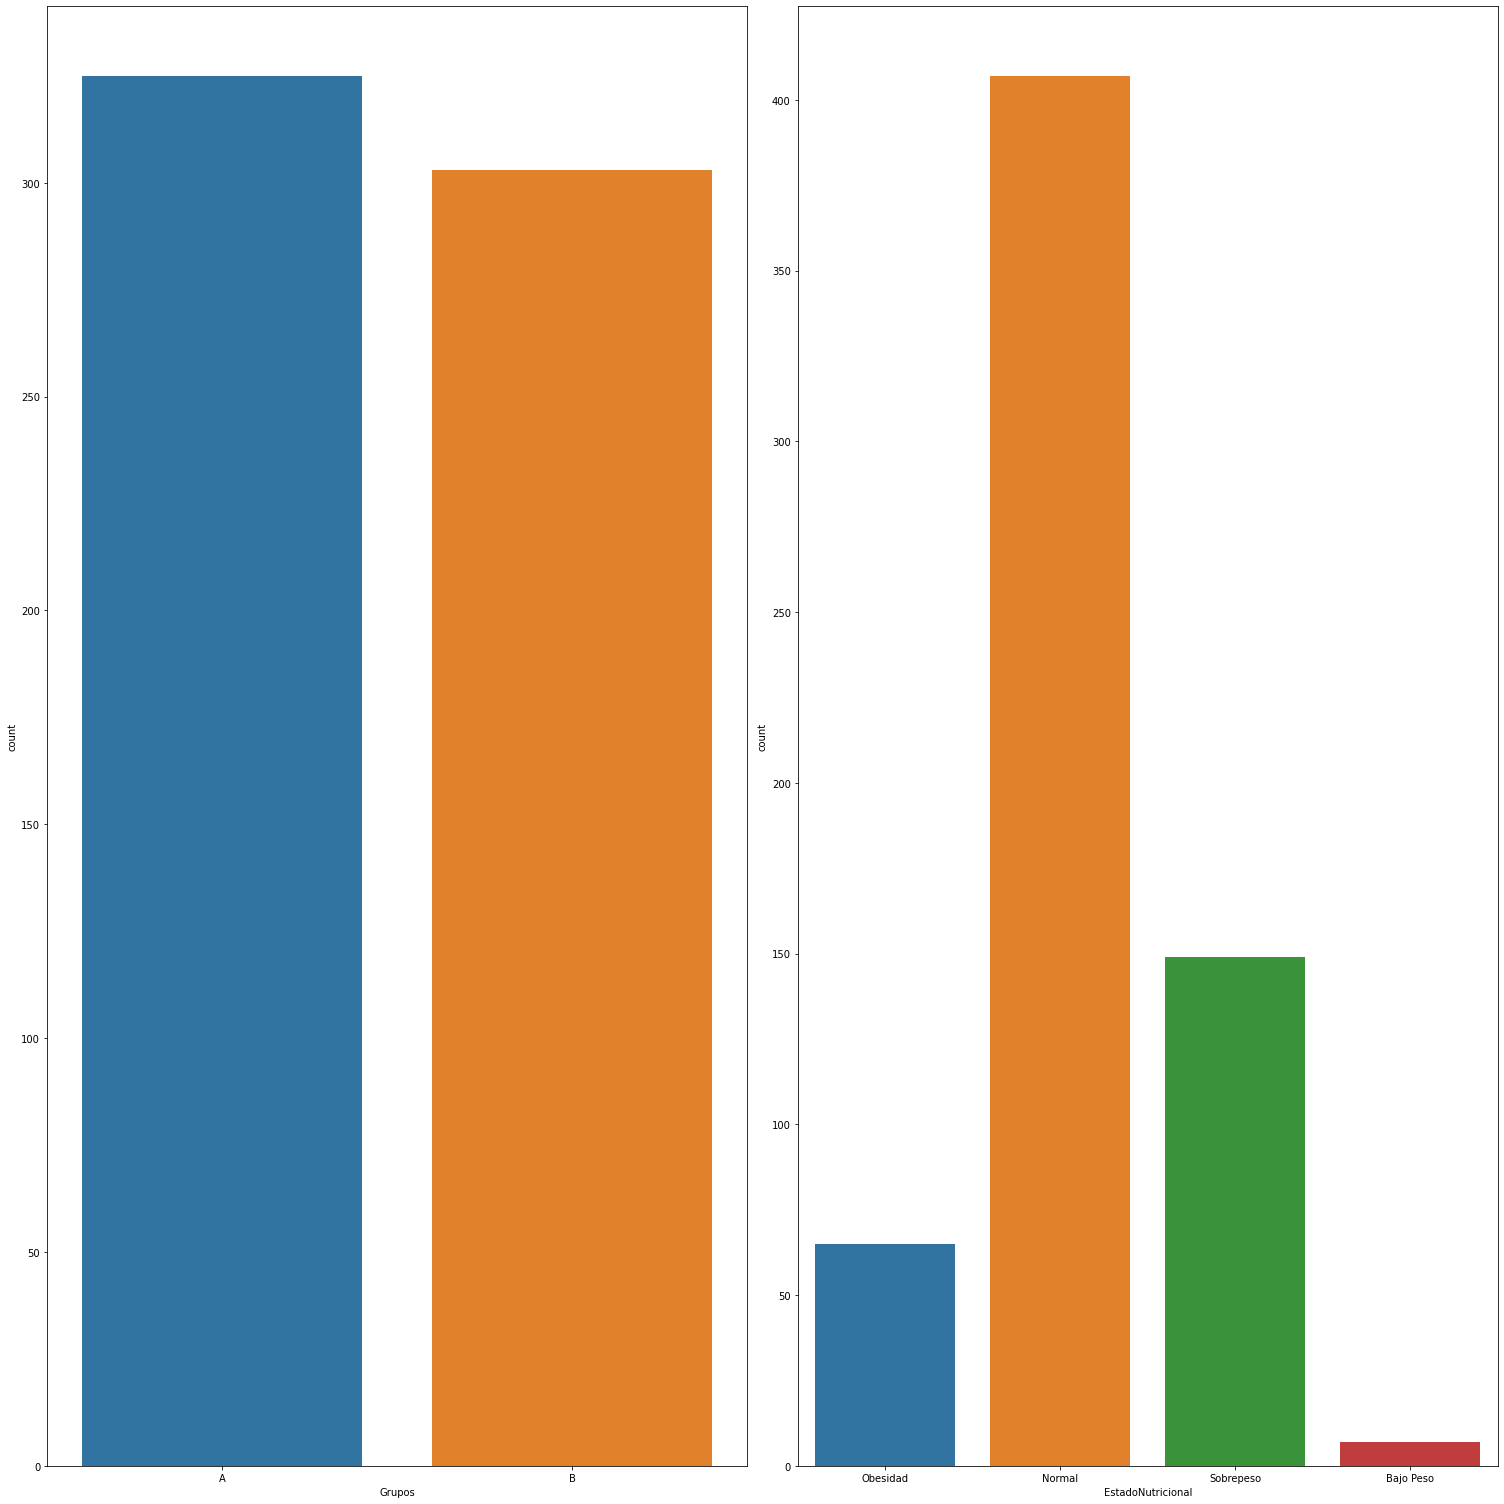

In [ ]:
plt.figure(figsize=(21, 21))
for i in range(0, len(categorical_features)):
    plt.subplot(1, int(len(categorical_features)/1),i+1)
    sns.countplot(df[categorical_features[i]])
    plt.tight_layout()

Variales numéricas con variables categoricas
Hagamos una análisis multivariado, en donde podamos combinar variables de tipo numérica con variables de tipo categoricas.

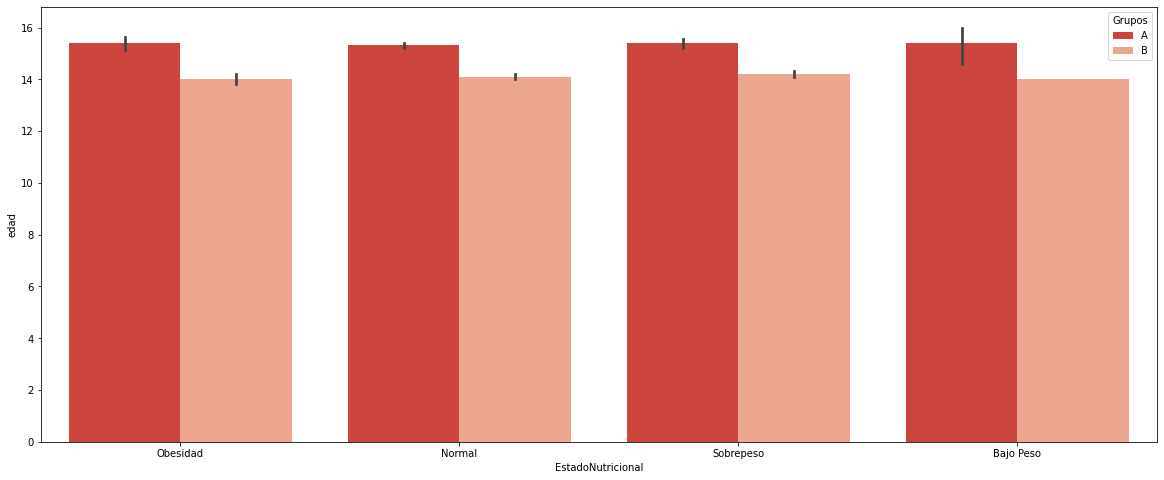

In [ ]:
f, ax = plt.subplots(1,1, figsize=(20,8))
ax = sns.barplot(x = 'EstadoNutricional', y = 'edad',
                 hue='Grupos', data=df1, palette='Reds_r')

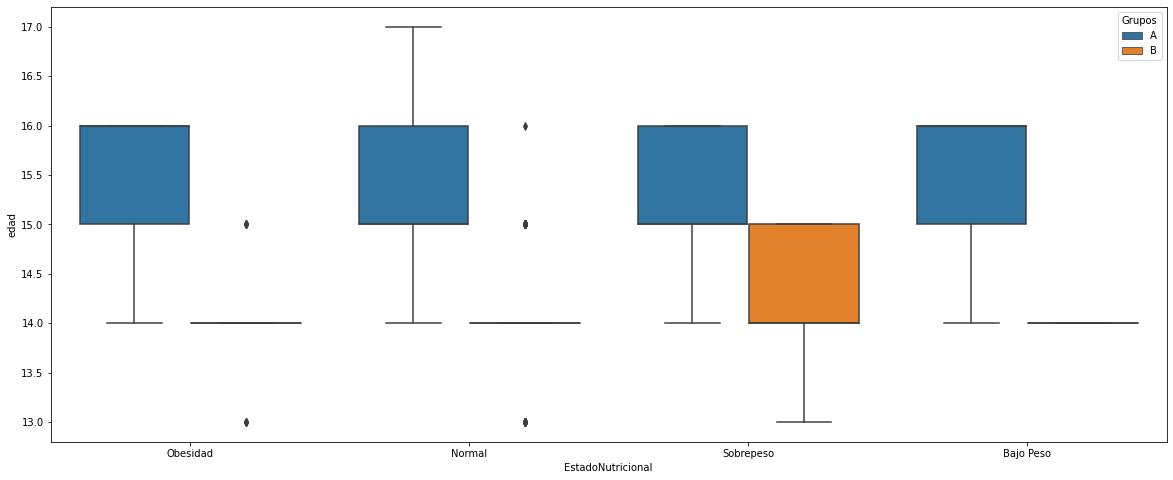

In [ ]:
f, ax = plt.subplots(1,1, figsize=(20,8))
sns.boxplot(x = "EstadoNutricional", y = "edad", hue = "Grupos", data = df1);

Finalmente, veamos el gráfico de conteo para cada columna categórica:
* De acuerdo a lo visualizado existen mas personas del grupo A que del gupo B

EDA Conclusion
Algunas de las cosas que encontramos de este conjunto de datos EDA son:

* Los datos parecen válidos y no hay defectos.
* Se tuvieron que recalcular los valores en base a sus formulas base.
* La mayoría de las columnas numéricas tienen una distribución sesgada, esto debe recordarse si queremos hacer algo o usar un modelo que requiera asumir una distribución normal.
* Nuestro objetivo EstadoNutricional tiene una fuerte presencia en el grupo A, existiendo casos representativos, en lugar del grupo B que tiene mayor presencia de casos con sobrepeso, para poder tener mayo presición descatamos la variable Grupos

# 2do entregable: Aplicar Estadística Inferencial
Trabajar hasta con 5 variables.

Convertimos nuestra variable categorica EstadoNutricional a numerica

In [ ]:
def fnutricional(parm):
  vvalor = parm;
  if vvalor=='Bajo Peso':
     rcode = 1
  elif vvalor=='Normal':
     rcode = 2
  elif vvalor== 'Sobrepeso':
     rcode = 3
  else:
     rcode = 4
  return rcode

In [ ]:
#Completamos la talla
df1["Nutricional"] = df1.apply(lambda row: fnutricional(row['EstadoNutricional']), axis=1)

In [ ]:
df2 = df1[["Nutricional", "masa_corporal_magra_kg", "circun_cuello", "IMCCompleta", "edad"]].copy()
df2

,Nutricional,masa_corporal_magra_kg,circun_cuello,IMCCompleta,edad
0,4,45.250304,35.7,29.576170,16
1,2,43.437664,31.8,22.364707,16
2,2,34.435097,30.5,21.623567,16
3,2,39.384269,32.6,23.117479,16
5,3,48.540674,33.9,26.124451,16
...,...,...,...,...,...
647,2,71.095263,32.5,21.029381,14
648,3,34.717206,31.5,23.132073,14
649,2,43.218592,31.5,22.769438,15
650,4,68.809463,37.0,27.023922,14


In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Nutricional,602.0,2.426910,0.684125,1.000000,2.000000,2.000000,3.000000,4.000000
masa_corporal_magra_kg,602.0,43.383450,6.940251,28.498090,38.158313,42.335236,48.100221,71.568947
circun_cuello,602.0,32.150498,2.157903,24.500000,30.700000,32.000000,33.500000,39.200000
IMCCompleta,602.0,22.400682,3.044080,14.537886,20.273556,22.120429,23.861445,36.708603
edad,602.0,14.757475,0.871619,13.000000,14.000000,15.000000,15.000000,17.000000


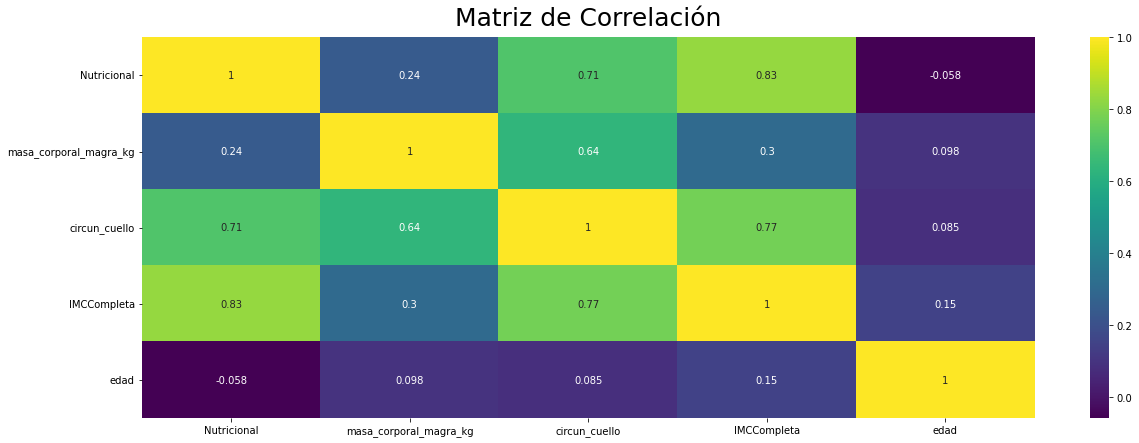

In [ ]:
# Matriz de correlación
plt.figure(figsize=(20, 7))
heatmap = sns.heatmap(df2.corr(),cmap='viridis',annot=True)

heatmap.set_title('Matriz de Correlación', fontdict={'fontsize':25}, pad=12);

## Prueba de Normalidad
PLANTEAMIENTO DE LAS HIPóTESIS

Ho: Los datos estan normalmente distribuidos      
Ha: Los datos no estan normalmente distribuidos

Nivel de significancia = 5% (0.05)

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro # n <= 50
from scipy.stats import kstest  # n > 50
from scipy.stats import zscore

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


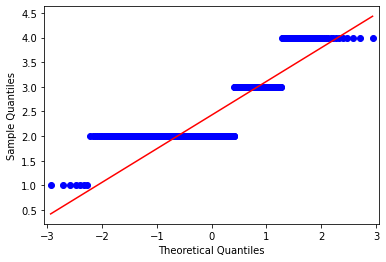

In [ ]:
# Prueba normalidad: Nutricional

qqplot(df2['Nutricional'] , line='s')
plt.show()

In [ ]:
#Cuando n > 50

stat2, p2 = kstest(df2['Nutricional'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.966, p-value=0.000


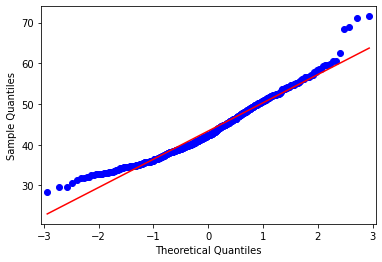

In [ ]:
# Prueba normalidad: masa_corporal_magra_kg

qqplot(df2['masa_corporal_magra_kg'] , line='s')
plt.show()

In [ ]:
#Cuando n > 50

stat2, p2 = kstest(df2['masa_corporal_magra_kg'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


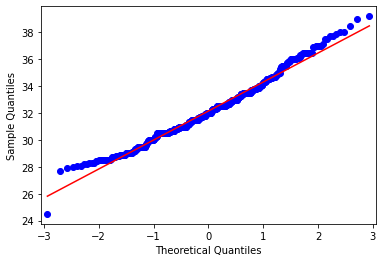

In [ ]:
# Prueba normalidad: circun_cuello

qqplot(df2['circun_cuello'] , line='s')
plt.show()

In [ ]:
#Cuando n > 50

stat2, p2 = kstest(df2['circun_cuello'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


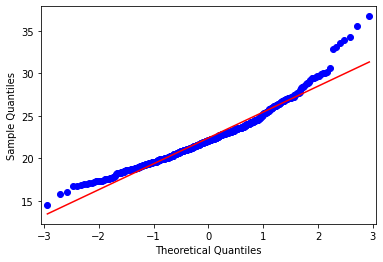

In [ ]:
# Prueba normalidad: IMC

qqplot(df2['IMCCompleta'] , line='s')
plt.show()

In [ ]:
#Cuando n > 50

stat2, p2 = kstest(df2['IMCCompleta'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


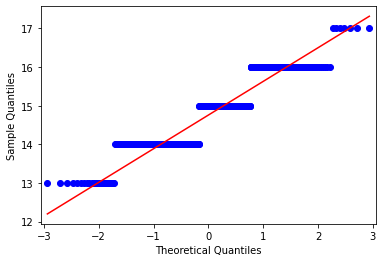

In [ ]:
# Prueba normalidad: edad

qqplot(df2['edad'] , line='s')
plt.show()

In [ ]:
#Cuando n > 50

stat2, p2 = kstest(df2['edad'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


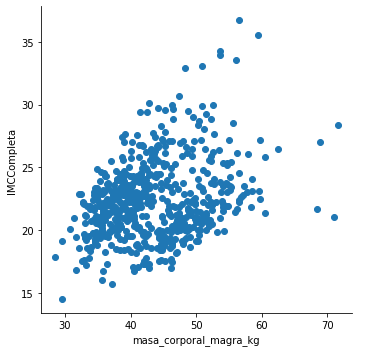

In [ ]:
# Graficamos las variables a correlacionar
sns.FacetGrid(df2, size=5).map(plt.scatter, "masa_corporal_magra_kg", "IMCCompleta").add_legend()

In [ ]:
# Correlación spearmanr
from scipy.stats import pearsonr, spearmanr

rho, p = spearmanr(df2['masa_corporal_magra_kg'], df2['IMCCompleta'])

print('Correlación Rho=%.3f, p-value=%.3f' % (rho, p))

Correlación Rho=0.242, p-value=0.000


Conclusión: Con un nivel de significancia del 5% se afirma que, la masa_corporal_magra_kg y el IMCCompleta son mutuamente dependientes, con una correlación de rho = 0.242.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


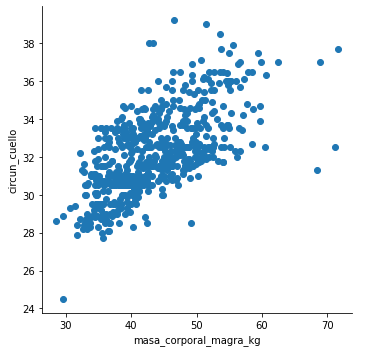

In [ ]:
# Graficamos las variables a correlacionar
sns.FacetGrid(df2, size=5).map(plt.scatter, "masa_corporal_magra_kg", "circun_cuello").add_legend()

In [ ]:
# Correlación spearmanr
from scipy.stats import pearsonr, spearmanr

rho, p = spearmanr(df2['masa_corporal_magra_kg'], df2['circun_cuello'])

print('Correlación Rho=%.3f, p-value=%.3f' % (rho, p))

Correlación Rho=0.632, p-value=0.000


Conclusión: Con un nivel de significancia del 5% se afirma que, la masa_corporal_magra_kg y el circun_cuello son mutuamente dependientes, con una correlación de rho = 0.632.

## Chi - Cuadrado
2 variables son cualitativas (ordinales y/o nominales)

Ho: Las variables A y B son mutuamente independientes.

Ha: Las variables A y B son mutuamente dependientes.

In [ ]:
#                                          
contingencia= pd.crosstab(df2['Nutricional'], df2['edad']) 
contingencia

edad,13,14,15,16,17
Nutricional,,,,,
1,0,3,1,3,0
2,17,143,145,79,7
3,4,63,47,30,0
4,5,25,16,14,0


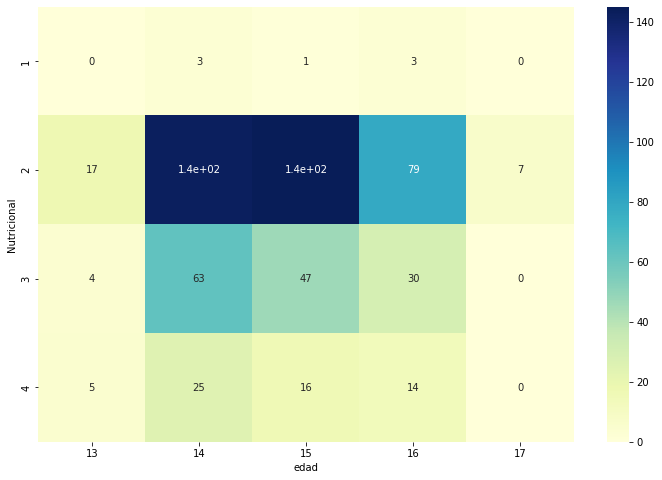

In [ ]:
# Mapa de calor
plt.figure(figsize=(12,8)) 
sns.heatmap(contingencia, annot=True, cmap="YlGnBu")

In [ ]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency

c, p, dof, expected = chi2_contingency(contingencia)
# Print the p-value
print('p-value = %.3f'% p)

p-value = 0.346


### Conclusión
* Podemos mencionar que ambas variables son mutumente independientes en vista que le valor resultante es mayor a cero, se aprueba la hipotecis nula
* Se puede afirmar que los adolescentes de 13 y 17 no poseen Bajo Peso
* La cuarta parte de los adolescentes entre 14, 15 y 16, presentan sobre peso